In [1]:
import lxml.html
import requests

In [2]:
html = requests.get("https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?name=Poaceae&lvl=8")

In [3]:
print(html)

<Response [200]>


In [4]:
dom = lxml.html.fromstring(html.text)

In [48]:
print(dom.xpath('//*[@title="genus"]/strong')[1].text)

Streptochaeta


In [5]:
genuses = dom.xpath('//*[@title="genus"]/strong')

In [6]:
genlist = []
for genus in genuses:
    genlist.append(genus.text)

In [7]:
print(len(genlist))

768


In [22]:
print(genlist)

['Anomochloa', 'Streptochaeta', 'Acidosasa', 'Ampelocalamus', 'Arundinaria', 'Bashania', 'Bergbambos', 'Borinda', 'Brachystachyum', 'Chimonobambusa', 'Chimonocalamus', 'Drepanostachyum', 'Fargesia', 'Ferrocalamus', 'Gaoligongshania', 'Gelidocalamus', 'Hibanobambusa', 'Himalayacalamus', 'Indocalamus', 'Indosasa', 'Kuruna', 'Menstruocalamus', 'Oldeania', 'Oligostachyum', 'Phyllostachys', 'Pleioblastus', 'Pseudosasa', 'Qiongzhuea', 'Sarocalamus', 'Sasa', 'Sasaella', 'Semiarundinaria', 'Shibataea', 'Sinobambusa', 'Thamnocalamus', 'Yushania', 'Actinocladum', 'Alvimia', 'Arthrostylidium', 'Atractantha', 'Aulonemia', 'Colanthelia', 'Elytrostachys', 'Filgueirasia', 'Glaziophyton', 'Merostachys', 'Rhipidocladum', 'Bambusa', 'Bambusa x Dendrocalamus', 'Bonia', 'Cyrtochloa', 'Dendrocalamus', 'Dinochloa', 'Gigantochloa', 'Greslania', 'Holttumochloa', 'Kinabaluchloa', 'Maclurochloa', 'Melocalamus', 'Mullerochloa', 'Neololeba', 'Neomicrocalamus', 'Neosinocalamus', 'Oreobambos', 'Oxytenanthera', 'Phu

In [9]:
di = dom.xpath('//*[@type="disk"]')

In [10]:
for i in di:
    for k in list(i):
        if k.tag == "ul":
            break
    else:
        temp = i[0]
        while(temp.getparent()):
            try:
                if temp.attrib["title"] == "genus":
                    break
                else:
                    temp = temp.getparent()
                    print("genus")
            except:
                temp = temp.getparent()
        else:
            print(i.text_content())

In [11]:
ci = dom.xpath('//*[@type="circle"]')

In [ ]:
for i in ci:
    for k in list(i):
        if k.tag == "ul":
            break
    else:
        temp = i
        flag = True
        while(temp.getparent() is not None):
            try:
                if temp.tag == "li":
                    if temp.xpath("a")[0].attrib["title"] == "genus":
                        flag = False
                        break
                    else:
                        temp = temp.getparent()
                else:
                    temp = temp.getparent()
                    # print("genus")
            except (KeyError, IndexError):
                temp = temp.getparent()
        else:
            print(i.text_content())

In [8]:
import pickle
with open("Poaceae/genuses.pickle", "wb")as fi:
    pickle.dump(genlist, fi)

In [9]:
with open("Poaceae/genuses.pickle", "rb")as fi:
    genlist2 = pickle.load(fi)
print(genlist == genlist2)

True


In [10]:
from classes2 import MCS_Finder
import os
import time
import pickle
import datetime
start = time.time()
with open("Poaceae/genuses.pickel", "rb")as fi:
    genlist = pickle.load(fi)
try:
    with open("Poaceae/genuses.pickel", "rb")as fi:
        genlist2 = pickle.load(fi)
    for genus in genlist:
        if not os.path.exists("Poaceae"):
            os.mkdir("Poaceae")
        if os.path.exists("Poaceae/" + genus):
            continue
        f = MCS_Finder(genus, "Poaceae")
        f.make_kcfs()
        print(datetime.datetime.now())
        time.sleep(15)
except:
    print(time.time() - start)
    print(datetime.datetime.now())
    raise
print(time.time() - start)
print(datetime.datetime.now())

0.0054781436920166016
2018-01-10 10:42:36.382440


In [14]:
import os
ari = []
for genus in os.listdir("Poaceae"):
    if genus == ".DS_Store" or genus == "others" or genus == "genuses.pickle":
        continue
    elif os.listdir("Poaceae/" + genus) == []:
        continue
    else:
        ari.append(genus)

In [15]:
print(len(ari))

51


In [58]:
len(os.listdir("Poaceae"))

771

In [59]:
print(len(genlist))

768


In [60]:
for i in os.listdir("Poaceae"):
    if i not in genlist:
        print(i)

.DS_Store
genuses.pickel
others


In [54]:
import shutil

In [57]:
for i in os.listdir("Poaceae"):
    if i == ".DS_Store" or i == "others" or i == "genuses.pickel":
        continue
    if i not in genlist:
        shutil.rmtree("Poaceae/" + i)
        print(i)

Acidimicrobium
Acidipropionibacterium
Aciditerrimonas
Acidothermus
Acrocarpospora
Actinoallomurus
Actinoalloteichus
Actinobaculum
Actinocatenispora
Actinocorallia
Actinocrinis
Actinocrispum
Actinokineospora
Actinomadura
Actinomyces
Actinomycetospora
Actinophytocola
Actinoplanes
Actinopolymorpha
Actinopolyspora
Actinorectispora
Actinorhabdospora
Actinorugispora
Actinospica
Actinosynnema
Actinotalea
Actinotignum
Adlercreutzia
Aeriscardovia
Aeromicrobium
Aestuariimicrobium
Agreia
Agrococcus
Agromyces
Alloactinosynnema
Allocatelliglobosispora
Allohumibacter
Allokutzneria
Allosalinactinospora
Alloscardovia
Allostreptomyces
Alpinimonas
Amnibacterium
Amycolatopsis
Angustibacter
Aquihabitans
Aquipuribacter
Arcanobacterium
Arenivirga
Arsenicicoccus
Arthrobacter
Asaccharobacter
Asanoa
Atopobium
Aurantimicrobium
Auraticoccus
Auritidibacter
Austwickia
Barrientosiimonas
Beutenbergia
Bifidobacterium
Blastococcus
Bogoriella
Bombiscardovia
Brachybacterium
Branchiibius
Brevibacterium
Brooklawnia
Calidi

イネ科抜き終わり

In [2]:
from classes2 import control_all_genus

In [3]:
cag = control_all_genus("Poaceae")

In [4]:
len(cag.ari)

51

In [5]:
sorted(cag.get_number_of_Cnumber().items(), reverse = True, key =lambda x: x[1]) 

[('C00006681', 17),
 ('C00002374', 17),
 ('C00006796', 16),
 ('C00002376', 16),
 ('C00006799', 15),
 ('C00006877', 14),
 ('C00006698', 14),
 ('C00006860', 14),
 ('C00000019', 9),
 ('C00000020', 9),
 ('C00000001', 8),
 ('C00000003', 7),
 ('C00046784', 7),
 ('C00003674', 6),
 ('C00000029', 6),
 ('C00007366', 6),
 ('C00035044', 5),
 ('C00007363', 5),
 ('C00035101', 5),
 ('C00003672', 5),
 ('C00035060', 5),
 ('C00000008', 5),
 ('C00000218', 4),
 ('C00000044', 4),
 ('C00007364', 4),
 ('C00000091', 4),
 ('C00013329', 4),
 ('C00007365', 4),
 ('C00002743', 4),
 ('C00002903', 4),
 ('C00035077', 4),
 ('C00000004', 4),
 ('C00000053', 4),
 ('C00000024', 4),
 ('C00000298', 3),
 ('C00000009', 3),
 ('C00001417', 3),
 ('C00000034', 3),
 ('C00004461', 3),
 ('C00029585', 3),
 ('C00001435', 3),
 ('C00001151', 3),
 ('C00005561', 3),
 ('C00000096', 3),
 ('C00001707', 3),
 ('C00001411', 3),
 ('C00011215', 3),
 ('C00002682', 2),
 ('C00000094', 2),
 ('C00000366', 2),
 ('C00000152', 2),
 ('C00001432', 2),
 ('C

In [6]:
sorted(cag.get_split_kcfs().items(), reverse=True, key=lambda x: x[1])

[(('RING', 'C-C-C-C-C-C'), 1375),
 (('RING', 'C8-C8-C8-C8-C8-C8'), 790),
 (('RING', 'C-C-C-C-C-O'), 430),
 (('RING', 'C1-C1-C1-C1-C1-O2'), 372),
 (('RING', 'C1y-C1y-C1y-C1y-C1y-O2x'), 338),
 (('RING', 'C1-C1-C1-C1-C1-C1'), 328),
 (('RING', 'C-C-C-C-C-C-C-C-C-C'), 310),
 (('RING', 'C-C-C-C-C'), 294),
 (('SKELETON', 'C-C-C-C-C-C'), 294),
 (('RING', 'C8x-C8y-C8x-C8y-C8y-C8y'), 289),
 (('SKELETON', 'C1-C1-C1-C1-C1-C1'), 276),
 (('RING', 'C-C-C-C-C-C-C-C-O-C'), 267),
 (('RING', 'C-C-C-C-C-C-C-C-C'), 262),
 (('RING', 'C8-C8-C8-C8-C8-C8-C8-C8-O2-C8'), 249),
 (('RING', 'C8x-C8x-C8y-C8x-C8y-C8y'), 241),
 (('SKELETON', 'C1b-C1y-C1y-C1y-C1y-C1y'), 224),
 (('RING', 'C1-C1-C1-C1-C1-C1-C1-C1-C1'), 223),
 (('SKELETON', 'C-C-C(C-C-C)-C-C-C-C-C-C-C-C-C'), 190),
 (('RING', 'C-C-C-O-C-C'), 186),
 (('SKELETON', 'C8-C8-C8(C8-C8-C8)-C8-C8-C8-C8-C8-C8-C8-C8-C8'), 177),
 (('RING', 'C1-C1-C1-C1-C1'), 168),
 (('RING', 'C8x-C8y-C8x-C8y-C8y-C8x-C8y-C8y-O2x-C8y'), 134),
 (('RING', 'C8x-C8y-C8y-O2x-C8y-C8y'), 134),

In [7]:
specific = cag.get_specifics()

In [8]:
spe = sorted(specific.items(), reverse=True, key=lambda x: x[1])

In [9]:
spe

[(('TRIPLET', 'C1x-C1z-C2b'), (14, 'Oryza')),
 (('RING', 'C1y-C1y-C1y-C8y-C8y-O2x'), (12, 'Hordeum')),
 (('VICINITY', 'C1y(C1y+C8y+C8y)'), (12, 'Hordeum')),
 (('RING', 'C1-C1-C1-C8-C8-O2'), (12, 'Hordeum')),
 (('RING', 'C1-C1-C1-C8-C8-C8-C8-C8-C8-O2'), (12, 'Hordeum')),
 (('VICINITY', 'C1z(C1y+C1y+C1y+O7x)'), (11, 'Triticum')),
 (('TRIPLET', 'C1z-C2b-C2a'), (11, 'Oryza')),
 (('TRIPLET', 'C1a-C1z-C2b'), (11, 'Oryza')),
 (('VICINITY', 'C1z(C1a+C1a+C1y+C2y)'), (10, 'Vetiveria')),
 (('SKELETON', 'C-C-C-C-C-C(C)(C-C-C-C(C)-C)-C-C-C-C(C)-C-C'), (10, 'Oryza')),
 (('VICINITY', 'C1z(C1a+C1a+C1y+O2x)'), (10, 'Lolium')),
 (('BOND', 'C2-N1'), (10, 'Hordeum')),
 (('TRIPLET', 'N1-C2-N2'), (10, 'Hordeum')),
 (('RING', 'C1x-C1x-C1y-C1z-C1z-C1z'), (9, 'Lolium')),
 (('RING', 'C1x-C1y-C1y-O2x-C8y-C8y'), (9, 'Hordeum')),
 (('RING', 'C1-C1-C1-C1-C2-C1-C1'), (8, 'Vetiveria')),
 (('RING', 'C1x-C1x-C1y-C1z-C2y-C1y-C1z'), (8, 'Vetiveria')),
 (('RING', 'C1x-C1y-C1z-C2y-C1y-C1z'), (8, 'Vetiveria')),
 (('VICINITY

In [10]:
Cngenus = dict()
for genus in cag.ari:
    with open("Poaceae/" + genus + "/kcfs.kcfs")as fi:
        molecule = fi.read().split("///\n")
        Cngenus[genus] = len(molecule)
sorted(Cngenus.items(), reverse=True, key=lambda x: x[1])

[('Zea', 104),
 ('Oryza', 97),
 ('Hordeum', 71),
 ('Triticum', 59),
 ('Lolium', 38),
 ('Cymbopogon', 35),
 ('Vetiveria', 34),
 ('Sorghum', 33),
 ('Capillipedium', 30),
 ('Avena', 30),
 ('Saccharum', 23),
 ('Festuca', 21),
 ('Secale', 20),
 ('Phalaris', 20),
 ('Phyllostachys', 16),
 ('Gynerium', 16),
 ('Dactylis', 14),
 ('Phragmites', 13),
 ('Elymus', 13),
 ('Deschampsia', 12),
 ('Miscanthus', 12),
 ('Bothriochloa', 11),
 ('Anthoxanthum', 11),
 ('Phleum', 11),
 ('Setaria', 11),
 ('Arundo', 10),
 ('Alopecurus', 9),
 ('Sasa', 9),
 ('Molinia', 9),
 ('Avenula', 9),
 ('Arrhenatherum', 6),
 ('Briza', 6),
 ('Andropogon', 6),
 ('Panicum', 5),
 ('Trisetum', 5),
 ('Tribolium', 4),
 ('Imperata', 3),
 ('Spartina', 3),
 ('Stipa', 3),
 ('Muhlenbergia', 3),
 ('Dactyloctenium', 3),
 ('Leersia', 3),
 ('Eleusine', 3),
 ('Thelepogon', 2),
 ('Coix', 2),
 ('Hyparrhenia', 2),
 ('Agrostis', 2),
 ('Nardus', 2),
 ('Sporobolus', 2),
 ('Bromus', 2),
 ('Paspalum', 2)]

In [11]:
print(cag.get_Cnumber_from_label(spe[0][0][1]))

{'Oryza': ['C00000259', 'C00000260', 'C00000867', 'C00000883', 'C00003437', 'C00003461', 'C00034090', 'C00034091', 'C00034092', 'C00034093', 'C00034094']}


In [12]:
test = cag.get_Cnumber_from_label(spe[0][0][1])

In [13]:
hanni = []
for i in range(1, 52):
    page = str(i)
    with open("../../../database/knapsack-kcf/KNApSAck" + page + ".kcf")as f1:
        clist = f1.read().split()
        hanni.append(clist[1])

import sys
sys.path.append("../../module")
from rdkit.Chem import rdDepictor
import kcf.converter as kcfco
from rdkit import Chem
mol_list = []
counter = 0
nCnumber = []
for z, i in enumerate(sorted(list(test.items())[0][1])):
    num = int(i[1:])
    for p, k in enumerate(hanni[1:]):
        k2 = int(k[1:])
        if k2 > num:
            k3 = str(p+1)
            with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f2:
                Clist = f2.read().split("///\n")
                try:
                    for C in Clist:
                        if i == C.split()[1]:
                            molblock = kcfco.kcf_to_molblock(C)
                            # print("OK", i)
                            # print(molblock[1])
                            mol = Chem.MolFromMolBlock(molblock[1])
                            if mol is None:
                                print("None", i, z, k3)
                                if "#+" in C or "#-" in C:
                                    print("Charge in\n")
                                counter += 1
                                break
                            rdDepictor.Compute2DCoords(mol)
                            mol_list.append(mol)
                            nCnumber.append(i)
                            if "#+" in C or "#-" in C:
                                print(i, z, k3, "Charge in\n")
                            break
                except IndexError:
                    counter += 1
                    print("DAME", i, z)
            break
print(counter)

0


In [16]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_list, legends=sorted(list(test.items())[0][1]), subImgSize=(400, 400))
img.save("dotpng/Poa_test-2.png")

In [30]:
from tools import search_all_Cnumber_from_label
from tools import get_genuses
from tools import get_name

In [31]:
import time
name = []
for genus in test:
    for Cn in test[genus]:
        time.sleep(5)
        name.append(get_genuses(Cn))
        print(Cn)
print(name)

C00000259
C00000260
C00000867
C00000883
C00003437
C00003461
C00034090
C00034091
C00034092
C00034093
C00034094
[['Oryza sativa'], ['Oryza sativa'], ['Oryza sativa'], ['Oryza sativa'], ['Oryza sativa cv. koshihikari'], ['Oryza sativa'], ['Oryza sativa'], ['Oryza sativa'], ['Oryza sativa'], ['Oryza sativa'], ['Oryza sativa']]


In [32]:
name

[['Oryza sativa'],
 ['Oryza sativa'],
 ['Oryza sativa'],
 ['Oryza sativa'],
 ['Oryza sativa cv. koshihikari'],
 ['Oryza sativa'],
 ['Oryza sativa'],
 ['Oryza sativa'],
 ['Oryza sativa'],
 ['Oryza sativa'],
 ['Oryza sativa']]

In [37]:
if name[0][0].split()[0] in cag.ari:
    print("ari")
name[0][0].split()[0]

ari


'Oryza'

In [38]:
for genus in test:
    Cnlist = test[genus]

In [39]:
print(Cnlist)

['C00000259', 'C00000260', 'C00000867', 'C00000883', 'C00003437', 'C00003461', 'C00034090', 'C00034091', 'C00034092', 'C00034093', 'C00034094']


In [ ]:
i = 0
url = "http://rest.genome.jp/simcomp2/"
urlC = ""
for Cnumber in Clist:
    urlC += Cnumber + "+"
else:
    urlC = urlC[:-1]
url += urlC + "/" + urlC + "/cutoff=0.1"
urllib.request.urlretrieve(url, filename)

In [40]:
import simnet2

In [65]:
import importlib
simnet2 = importlib.reload(simnet2)

In [43]:
simnet2.get_simcomp(Cnlist, "SIMCOMP2/Poaceae.txt")

True

11/11
edge:15


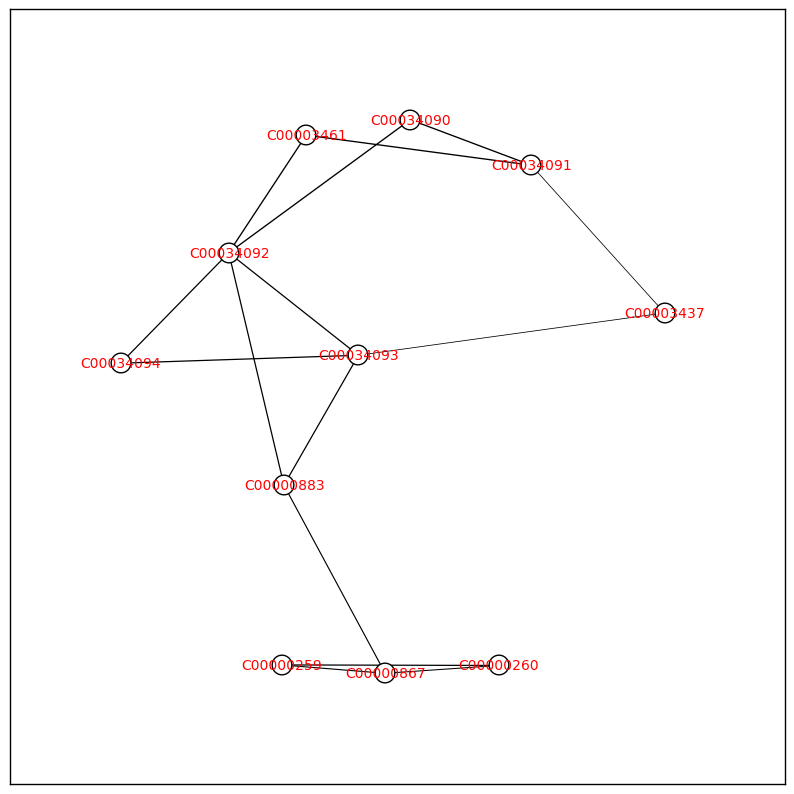

In [66]:
%matplotlib inline
simnet2.make_graph(Cnlist, filepath="SIMCOMP2/Poaceae.txt")

In [67]:
from tools import make_kcfs

In [69]:
make_kcfs(Cnlist, "Poaceae/Oryza/only")

True

In [76]:
path = "Poaceae/Oryza/only"
kosuu = dict()
with open(path + "splitedcount.txt")as f:
    units = f.read().split("\n")
    for unit in units[:-1]:
        temp = unit.split()
        kosuu[(temp[1], temp[2])] = kosuu.get((temp[1], temp[2]),0) + int(temp[3])

In [77]:
sorted(kosuu.items(), reverse=True, key=lambda x: x[1])

[(('RING', 'C-C-C-C-C-C'), 33),
 (('RING', 'C-C-C-C-C-C-C-C-C-C'), 22),
 (('SKELETON', 'C-C-C-C-C-C(C)(C-C-C-C(C)-C)-C-C-C-C(C)-C-C'), 10),
 (('RING', 'C1-C1-C1-C2-C2-C1'), 8),
 (('RING', 'C1-C1-C1-C1-C1-C1'), 8),
 (('RING', 'C1x-C1x-C1y-C2y-C2x-C1z'), 6),
 (('RING', 'C1x-C1x-C1y-C1z-C1y-C1z'), 4),
 (('SKELETON',
   'C2-C2-C1-C1-C1-C1(C1)(C1-C1-C1-C1(C1)-C1)-C1-C1-C1-C1(C1)-C2-C2'),
  4),
 (('RING', 'C-C-C-C-C-O-C-C-C'), 4),
 (('RING', 'C1-C1-C1-C1-C1-C1-C2-C2-C1-C1'), 4),
 (('RING', 'C1-C1-C1-C1-C1-C2'), 3),
 (('RING', 'C1-C1-C1-C1-C1-C1-C1-C1-C2-C2'), 3),
 (('RING', 'C1x-C1x-C1y-C2y-C1x-C1z'), 3),
 (('RING', 'C1x-C1x-C1z-C1y-C1z-C5x'), 3),
 (('RING', 'C1-C1-C1-C1-C1-C1-C5-C2-C2-C1'), 3),
 (('RING', 'C1-C1-C1-C1-C2-C2'), 3),
 (('RING', 'C1-C1-C1-C1-C2-C5'), 3),
 (('RING', 'C1-C1-C1-C2-C1-C1'), 3),
 (('RING', 'C1-C1-C1-C1-C1-C5'), 3),
 (('RING', 'C1-C1-C1-C1-C1-C1-C1-C2-C1-C1'), 2),
 (('RING', 'C-C-C-C-C-C-C-O-C-C-C'), 2),
 (('RING', 'C1x-C1x-C1y-C1z-C1y-C2y'), 2),
 (('RING', 'C1x-C1x-

In [80]:
path = "Poaceae/Oryza/only"
kosuu2 = dict()
with open(path + "kcfscount.txt")as f:
    units = f.read().split("\n")
    for unit in units[:-1]:
        temp = unit.split()
        kosuu2[(temp[1], temp[2])] = kosuu2.get((temp[1], temp[2]),0) + int(temp[3])

In [82]:
sorted(kosuu2.items(), reverse=True, key=lambda x: x[1])

[(('TRIPLET', 'C-C-C'), 396),
 (('BOND', 'C-C'), 242),
 (('TRIPLET', 'C1-C1-C1'), 232),
 (('ATOM', 'C'), 220),
 (('ATOM', 'C1'), 168),
 (('BOND', 'C1-C1'), 165),
 (('TRIPLET', 'C1-C1-C2'), 75),
 (('ATOM', 'C1x'), 62),
 (('TRIPLET', 'C-C-O'), 46),
 (('ATOM', 'C2'), 44),
 (('TRIPLET', 'C1a-C1z-C1y'), 43),
 (('TRIPLET', 'C1-C2-C2'), 41),
 (('BOND', 'C1-C2'), 41),
 (('ATOM', 'C1a'), 40),
 (('BOND', 'C1a-C1z'), 40),
 (('BOND', 'C1y-C1z'), 36),
 (('ATOM', 'C1z'), 36),
 (('RING', 'C-C-C-C-C-C'), 33),
 (('VICINITY', 'C(C+C+C+C)'), 33),
 (('TRIPLET', 'C1x-C1y-C1z'), 32),
 (('VICINITY', 'C(C+C+C)'), 31),
 (('BOND', 'C1x-C1z'), 31),
 (('TRIPLET', 'C1a-C1z-C1x'), 29),
 (('ATOM', 'C1y'), 29),
 (('BOND', 'C1x-C1x'), 27),
 (('BOND', 'C1x-C1y'), 25),
 (('TRIPLET', 'C1x-C1x-C1z'), 25),
 (('BOND', 'C-O'), 25),
 (('TRIPLET', 'C1x-C1z-C1y'), 24),
 (('BOND', 'C2-C2'), 22),
 (('ATOM', 'O'), 22),
 (('RING', 'C-C-C-C-C-C-C-C-C-C'), 22),
 (('TRIPLET', 'C1-C1-O1'), 20),
 (('TRIPLET', 'C1x-C1x-C1y'), 17),
 (('VI

In [72]:
len(Cnlist)

11

In [84]:
al = search_all_Cnumber_from_label("C1x-C1z-C2b")

In [85]:
print(len(al))

427
